**Copy your Colab link here:**. https://colab.research.google.com/drive/1FvYFXRlVgdSlK3Za6QbDsS7dDjIB9Cs_?usp=sharing

Import packages here

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

**Step 0. Moving the lab to your folder**

Duplicate this notebook (as you won't have write permission to this) to your Google Drive.
This can be done by clicking on *File Menu - Save a copy in Drive*

Run to mount your google drives:

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your drive would be accessed as '/content/drive/MyDrive' for Colab. You may need to put your data and creating a 'results' folder somewhere in the drive. The 'results' folder could be used for storing the required outputs.   

In [10]:
# example goes like:
path_data  = '/content/drive/MyDrive/data'

**Implementing K-Means**


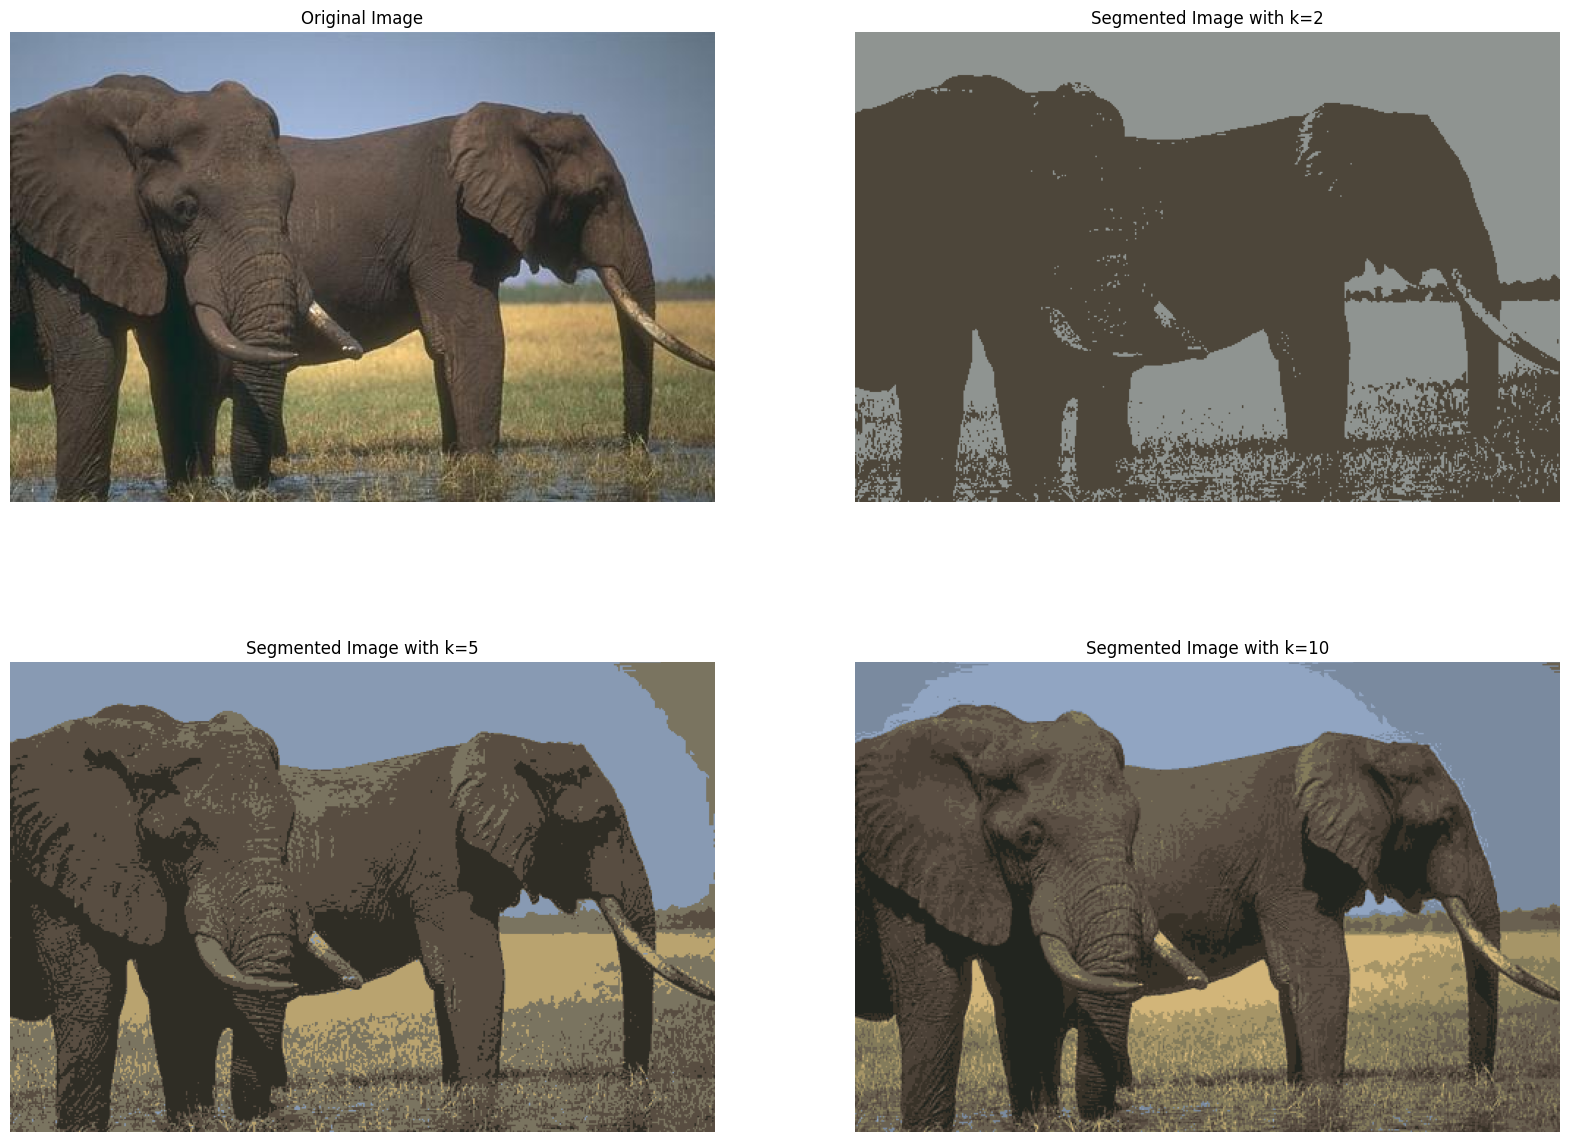

In [11]:
def kmeans(image, k, max_iter=100):

    # Step 1: Flatten the image into an Nx3 array, where each row represents a pixel and each column is an RGB channel
    pixels = image.reshape(-1, 3)

    # Step 2: Randomly select K pixels from the image to initialize the centroids
    np.random.seed(0)  # Set seed for reproducibility
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

    # Step 3: Iterate to adjust the centroids based on the pixel assignments
    for iteration in range(max_iter):
        # Step 4: Calculate the L1 (Manhattan) distance from each pixel to each centroid
        distances = np.abs(pixels[:, np.newaxis] - centroids).sum(axis=2)  # L1 distance between pixels and centroids

        # Step 5: Assign each pixel to the closest centroid
        closest_centroids = np.argmin(distances, axis=1)

        # Step 6: Update centroids by taking the mean RGB value of all pixels assigned to each centroid
        new_centroids = np.array([pixels[closest_centroids == j].mean(axis=0) for j in range(k)])

        # Step 7: Check if the centroids have converged (i.e., they no longer change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Step 8: Reconstruct the segmented image where each pixel is replaced by its corresponding centroid's RGB value
    segmented_img = centroids[closest_centroids].reshape(image.shape)

    return centroids, segmented_img

# Load the image
image = io.imread('/content/drive/MyDrive/data/elephant.jpg')  # Replace with the path to your image

# Apply K-Means clustering with k=2, k=5, and k=10
k_values = [2, 5, 10]
results = []

for k in k_values:
    centroids, segmented_img = kmeans(image, k, max_iter=100)
    results.append((k, segmented_img))

# Display the original image alongside the segmented images
plt.figure(figsize=(20, 15))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Segmented Image for k=2
plt.subplot(2, 2, 2)
plt.imshow(results[0][1].astype(np.uint8))  # Ensure pixel values are in uint8 for display
plt.title("Segmented Image with k=2")
plt.axis('off')

# Segmented Image for k=5
plt.subplot(2, 2, 3)
plt.imshow(results[1][1].astype(np.uint8))  # Ensure pixel values are in uint8 for display
plt.title("Segmented Image with k=5")
plt.axis('off')

# Segmented Image for k=10
plt.subplot(2, 2, 4)
plt.imshow(results[2][1].astype(np.uint8))  # Ensure pixel values are in uint8 for display
plt.title("Segmented Image with k=10")
plt.axis('off')

plt.show()

**Validation on test images**

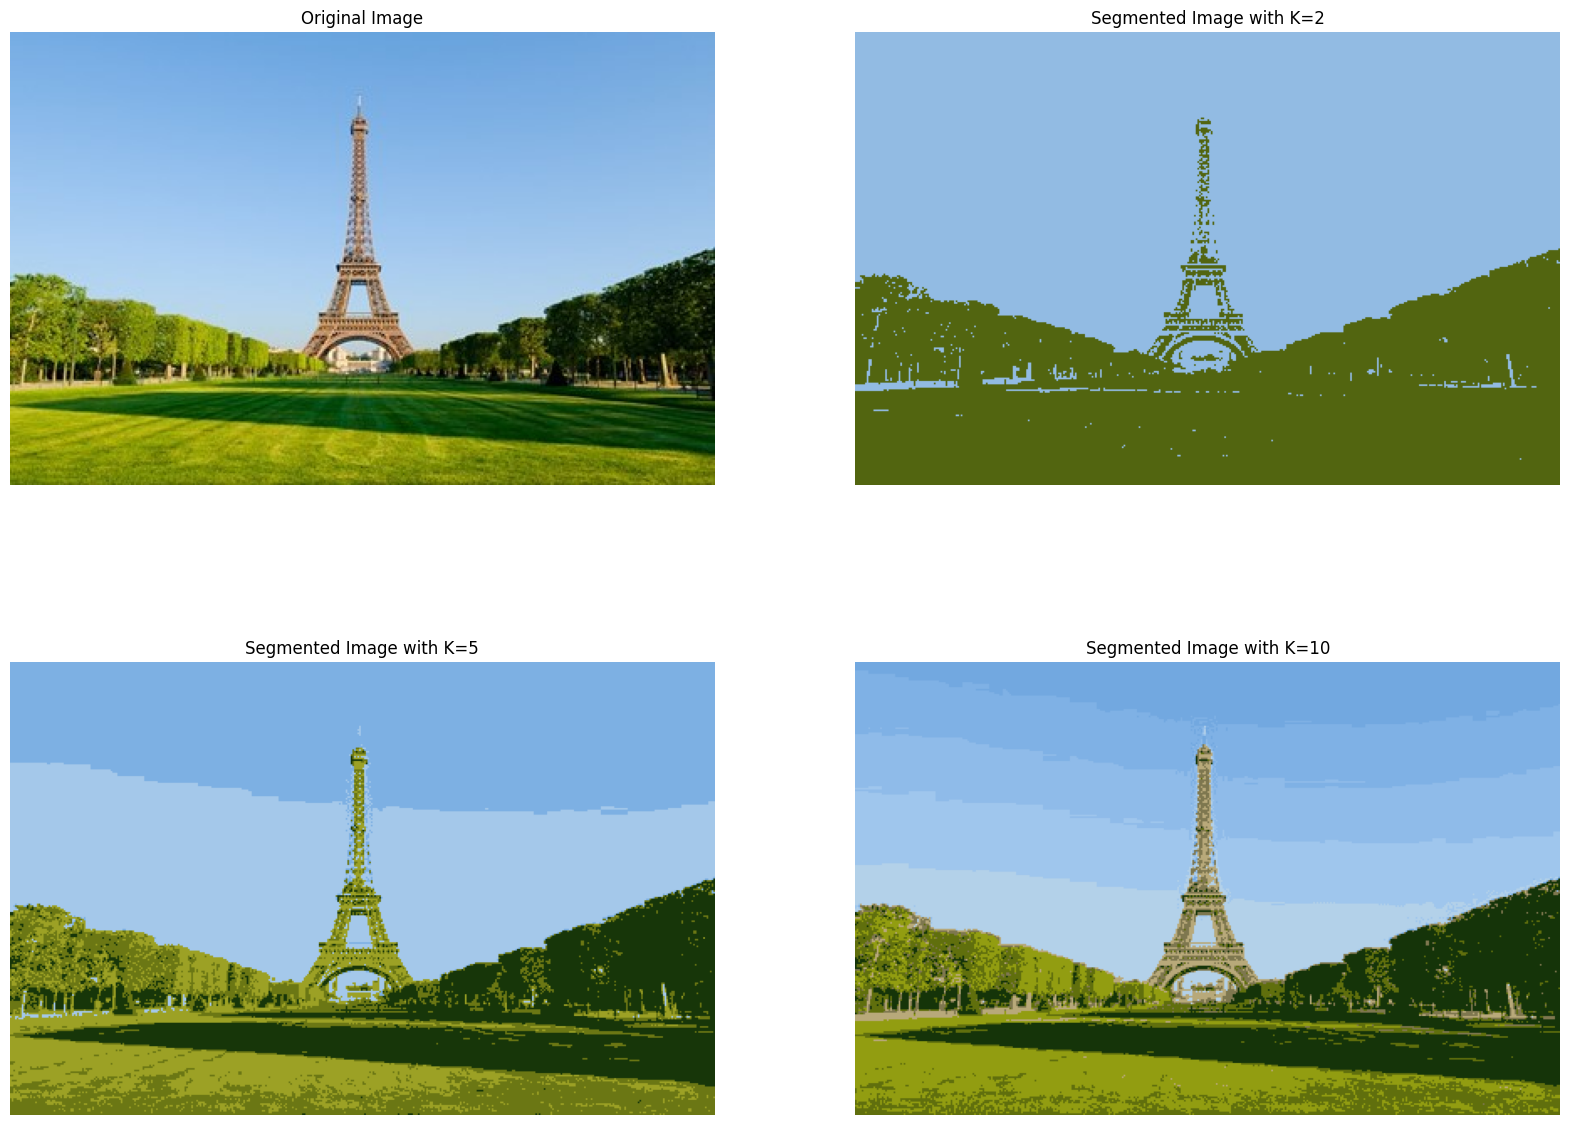

In [12]:
image = io.imread('/content/drive/MyDrive/data/eiffel.jpg')  # Load your image here (replace with image URL or path)

# Apply K-Means for k=2, k=5, and k=10
k_values = [2, 5, 10]
results = []

for k in k_values:
    centroids, segmented_img = kmeans(image, k, max_iter=100)
    results.append((k, segmented_img))

# Display the original and segmented images for k=2, k=5, and k=10
plt.figure(figsize=(20, 15))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Segmented Image for K=2
plt.subplot(2, 2, 2)
plt.imshow(results[0][1].astype(np.uint8))  # Convert to unsigned integers for display
plt.title("Segmented Image with K=2")
plt.axis('off')

# Segmented Image for K=5
plt.subplot(2, 2, 3)
plt.imshow(results[1][1].astype(np.uint8))  # Convert to unsigned integers for display
plt.title("Segmented Image with K=5")
plt.axis('off')

# Segmented Image for K=10
plt.subplot(2, 2, 4)
plt.imshow(results[2][1].astype(np.uint8))  # Convert to unsigned integers for display
plt.title("Segmented Image with K=10")
plt.axis('off')

plt.show()


**Comparison with existing K-Means**

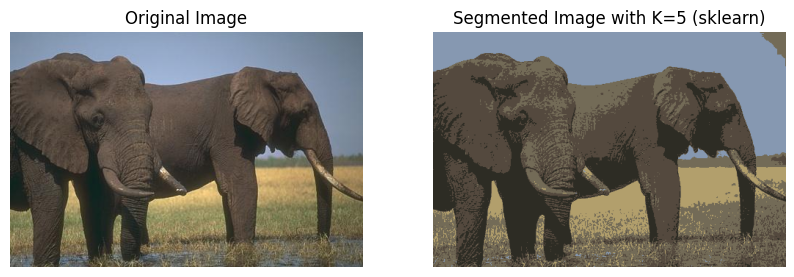

In [13]:
from sklearn.cluster import KMeans as existing_kmeans

# Load image
image = io.imread('/content/drive/MyDrive/data/elephant.jpg')  # Load your image here (replace with image URL or path)

# 1. Vectorize the image
pixels = image.reshape(-1, 3)  # Reshape the image into a 2D array where each pixel is an RGB vector

# 2. Apply K-Means clustering from sklearn for k=5
k = 5
# Changed here to use existing_kmeans
kmeans = existing_kmeans(n_clusters=k, random_state=0, max_iter=100).fit(pixels)

# 3. Get the K centroids (cluster centers) and the labels (which cluster each pixel belongs to)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# 4. Create the segmented image: replace each pixel value with its corresponding centroid value
segmented_img = centroids[labels].reshape(image.shape)

# 5. Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Segmented Image for K=5
plt.subplot(1, 2, 2)
plt.imshow(segmented_img.astype(np.uint8))  # Convert to unsigned integers for display
plt.title("Segmented Image with K=5 (sklearn)")
plt.axis('off')

plt.show()

**Code optimization (Optional)**

**You are ready to submit in Canvas!**

4 easy steps to submit your lab:

1.   Go to "File" - Download ".ipynb" and ".py" files
2.   Click on "Share" option on top right - Click on "copy link" option. Make sure your permission is set to "Anyone on the internet with this link can view"
3.   Upload the ".ipynb" file obtained from Step (1) with your 'results' folder to Canvas. If it is too big, zip it before uploading.
4.   In the text comments on Canvas, paste the link obtained from Step (3).

That's it!

In short, we want to have one link, one .ipynb, one ".py" and one 'Lab5_FirstnameLastname_yourJHID.zip' containing all the required data and outputs.
